Script to test roboflow images

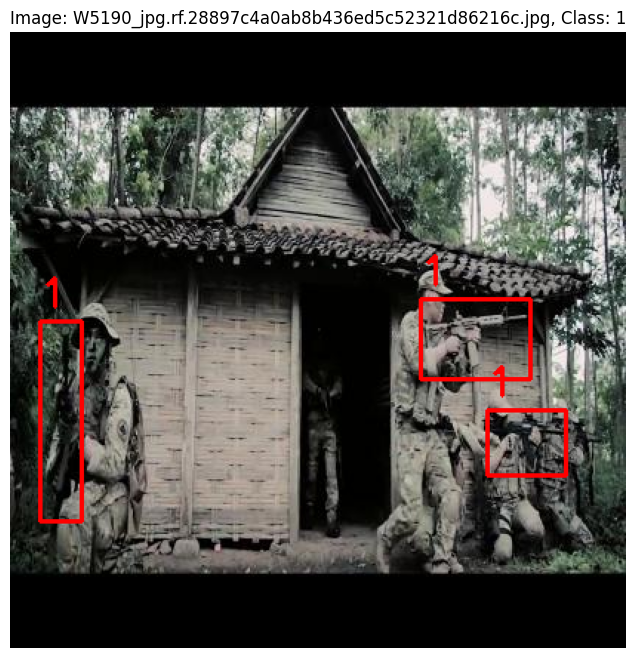

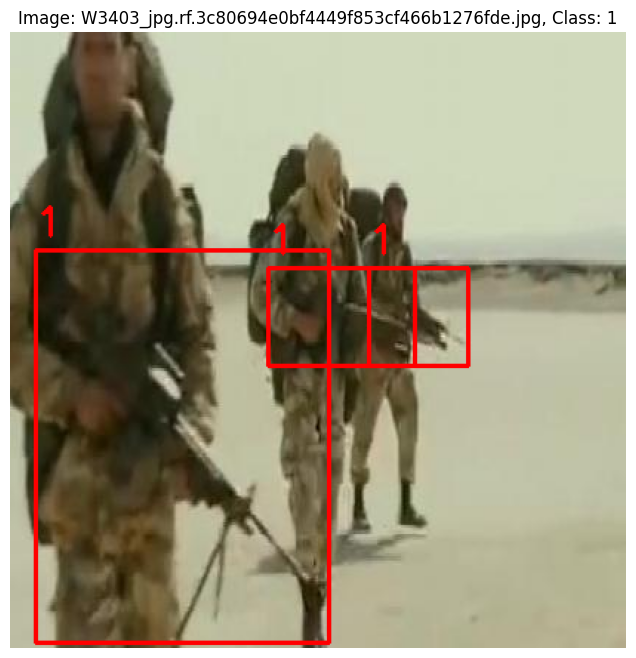

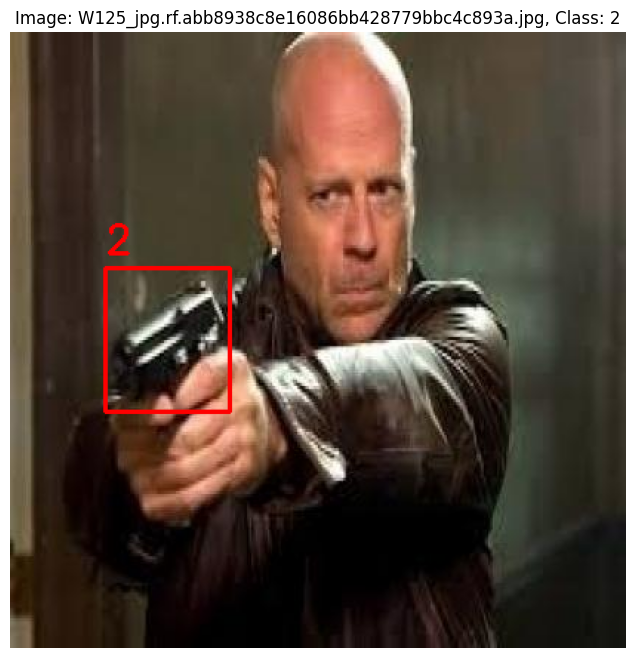

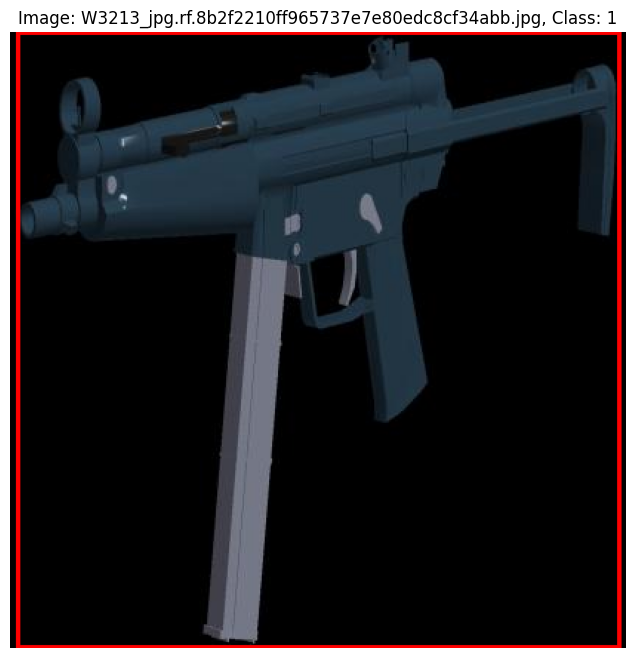

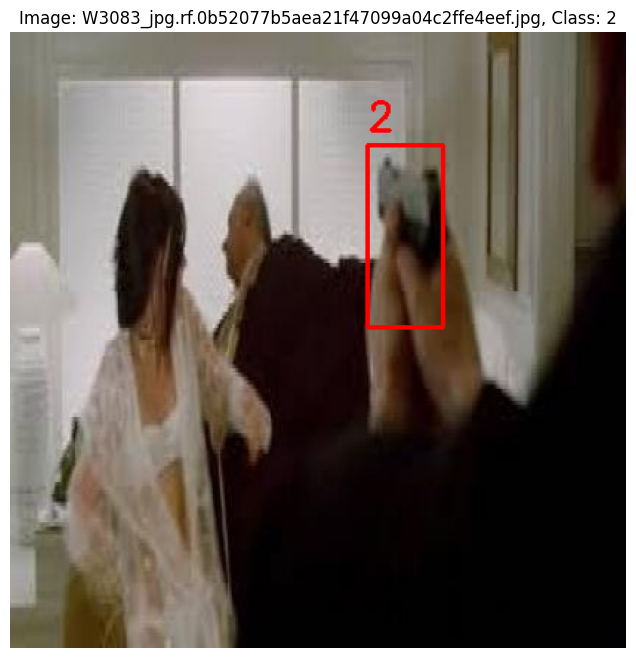

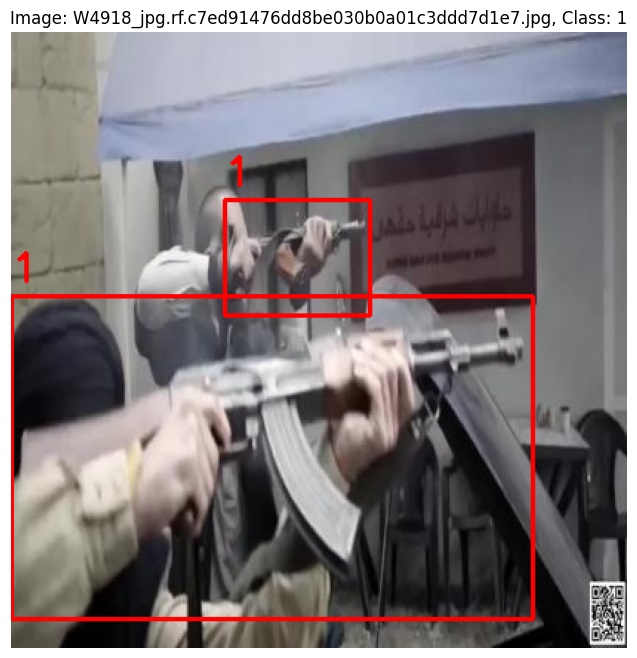

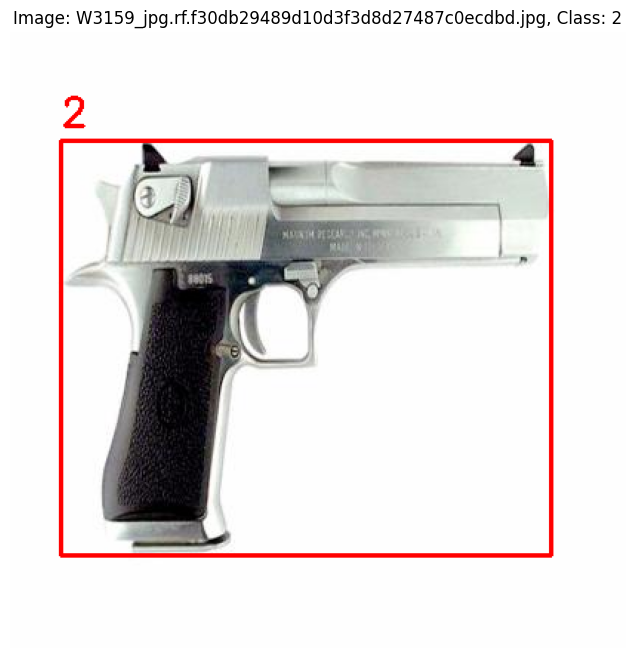

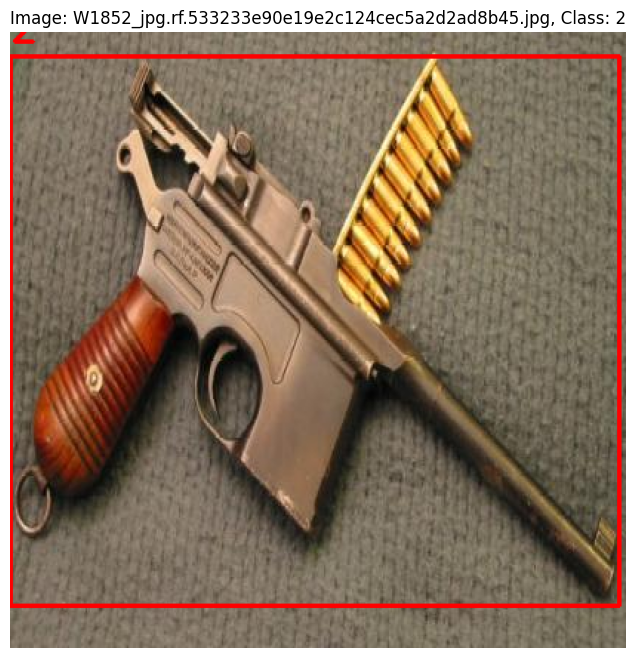

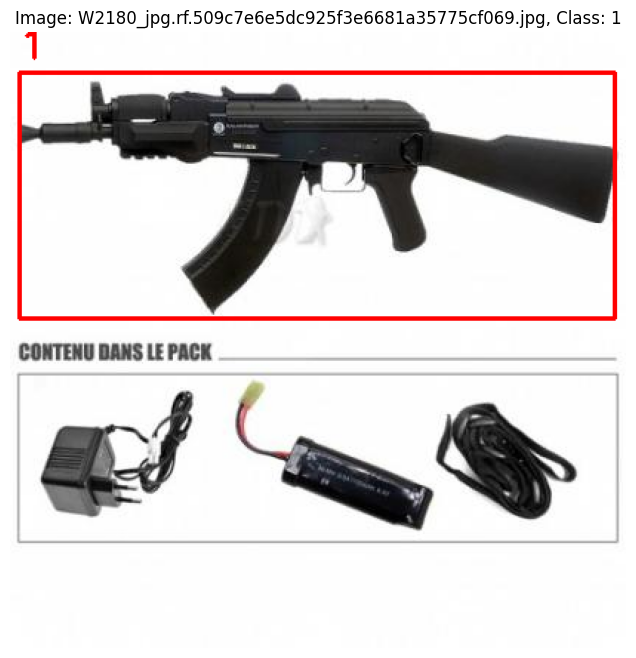

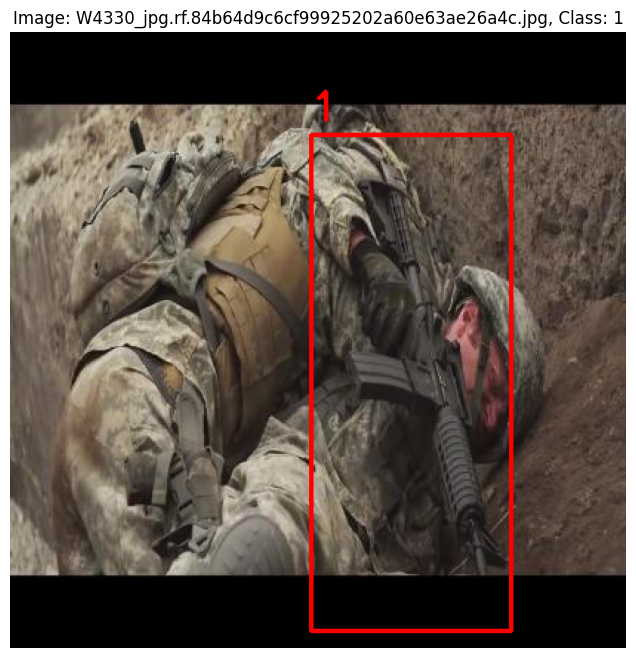

In [5]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Set the path to your images and labels directories
image_folder = "/home/research/Kilsar_Sentinal/Data/WeSecure/train/images"
label_folder = "/home/research/Kilsar_Sentinal/Data/WeSecure/train/labels"


# Function to draw bounding boxes on an image
def draw_bounding_box(image, boxes):
    h, w, _ = image.shape
    for box in boxes:
        cls, x_center, y_center, width, height = box
        # Convert YOLO format to pixel coordinates
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)
        
        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        
        # Draw the class name label at the top-left corner of the bounding box
        label = cls  # Class name as string
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return image

# Function to read label files, handle string class names
def read_yolo_labels(label_file):
    boxes = []
    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                cls = parts[0]  # First part is class name (string)
                box = list(map(float, parts[1:]))  # The rest are the box coordinates
                boxes.append([cls] + box)
    return boxes

# Load a random sample of 10 images from the dataset and display
def visualize_random_samples(image_folder, label_folder, num_samples=10):
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    random_samples = random.sample(image_files, min(num_samples, len(image_files)))

    for img_file in random_samples:
        image_path = os.path.join(image_folder, img_file)
        label_path = os.path.join(label_folder, os.path.splitext(img_file)[0] + '.txt')

        # Check if both image and label file exist
        if not os.path.exists(image_path):
            print(f"Image {image_path} not found, skipping.")
            continue
        if not os.path.exists(label_path):
            print(f"Label {label_path} not found, class set to 'NA'.")
            boxes = []  # No labels available, treat class as 'NA'
        else:
            # Read YOLO label file
            boxes = read_yolo_labels(label_path)

        # Read image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

        # If no labels, mark class as 'NA'
        if not boxes:
            class_names = ['NA']
        else:
            class_names = list(set([box[0] for box in boxes]))  # Unique class names from labels

        # Draw bounding boxes if labels exist
        image_with_boxes = draw_bounding_box(image, boxes)

        # Display image with bounding boxes, class name, and image name as heading
        plt.figure(figsize=(8, 8))
        plt.imshow(image_with_boxes)
        plt.title(f"Image: {img_file}, Class: {', '.join(class_names)}")
        plt.axis('off')
        plt.show()

# Run the visualization
visualize_random_samples(image_folder, label_folder, num_samples=10)


check bounding box is correct in dataset or not (top images)

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Directories
images_dir = "/mnt/storage/backup/label_wise_jainil/0/images/"
labels_dir =  "/mnt/storage/backup/label_wise_jainil/0/labels/"
# List all image files
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]  # Assuming images are in .jpg format

# Shuffle the list to get random images
random.shuffle(image_files)

# List of class names
class_names = ['class0', 'class1', 'class2']  # Replace with actual class names

def draw_bounding_box(image_path, label_path):
    # Read the image
    image = cv2.imread(image_path)
    image_height, image_width = image.shape[:2]

    # Read the labels
    with open(label_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        class_id = int(class_id)

        # Convert YOLO format to bounding box coordinates
        x_center, y_center, width, height = (
            x_center * image_width, y_center * image_height,
            width * image_width, height * image_height
        )
        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)
        x_max = int(x_center + width / 2)
        y_max = int(y_center + height / 2)

        # Draw the bounding box
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # Put the class label above the bounding box
        label = class_names[class_id]
        label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
        label_y_min = max(y_min, label_size[1] + 10)
        cv2.putText(image, label, (x_min, label_y_min - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

# Visualize top 6 random images
num_images_to_visualize = min(20, len(image_files))
for i in range(num_images_to_visualize):
    image_file = image_files[i]
    label_file = os.path.splitext(image_file)[0] + '.txt'

    image_path = os.path.join(images_dir, image_file)
    label_path = os.path.join(labels_dir, label_file)

    if os.path.exists(label_path):
        image_with_boxes = draw_bounding_box(image_path, label_path)

        # Convert BGR image to RGB for displaying with Matplotlib
        image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10))
        plt.imshow(image_with_boxes)
        plt.title(f"Image: {image_file}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Label file not found for image: {image_file}")


plot random images

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt


images_dir = "/mnt/storage/kilsar_mohammad/YouTube-GDD/train/images"
labels_dir =  "/mnt/storage/kilsar_mohammad/YouTube-GDD/train/labels"

# # Directories
# images_dir = "/mnt/storage/kilsar_jainil/detected_unzipped/detected/images"
# labels_dir = "/mnt/storage/kilsar_jainil/detected_unzipped/detected/labels"

# List all image files
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]  # Assuming images are in .jpg format

# Shuffle the list to get random images
random.shuffle(image_files)

# List of class names
class_names = ['class0', 'class1', 'class2']  # Replace with actual class names

def draw_bounding_box(image_path, label_path):
    # Read the image
    image = cv2.imread(image_path)
    image_height, image_width = image.shape[:2]

    # Read the labels
    with open(label_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        try:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            class_id = int(class_id)

            # Ensure class_id is within the range of class_names
            if class_id >= len(class_names):
                print(f"Warning: class_id {class_id} is out of range. Skipping this bounding box.")
                continue

            # Convert YOLO format to bounding box coordinates
            x_center, y_center, width, height = (
                x_center * image_width, y_center * image_height,
                width * image_width, height * image_height
            )
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)
            x_max = int(x_center + width / 2)
            y_max = int(y_center + height / 2)

            # Draw the bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

            # Put the class label above the bounding box
            label = class_names[class_id]
            label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
            label_y_min = max(y_min, label_size[1] + 10)
            cv2.putText(image, label, (x_min, label_y_min - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        except ValueError as e:
            print(f"Error processing line: {line}. Error: {e}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

    return image

# Visualize top 20 random images
num_images_to_visualize = min(20, len(image_files))
for i in range(num_images_to_visualize):
    image_file = image_files[i]
    label_file = os.path.splitext(image_file)[0] + '.txt'

    image_path = os.path.join(images_dir, image_file)
    label_path = os.path.join(labels_dir, label_file)

    if os.path.exists(label_path):
        image_with_boxes = draw_bounding_box(image_path, label_path)

        # Convert BGR image to RGB for displaying with Matplotlib
        image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10))
        plt.imshow(image_with_boxes)
        plt.title(f"Image: {image_file}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Label file not found for image: {image_file}")
